In [41]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import signal
import os
from scipy.interpolate import griddata
os.chdir('/home/jiarong/research/05.28/pressure_testRE_' + 'm0.1B0Ustar0.8ak0.05Bo200Re100000.')

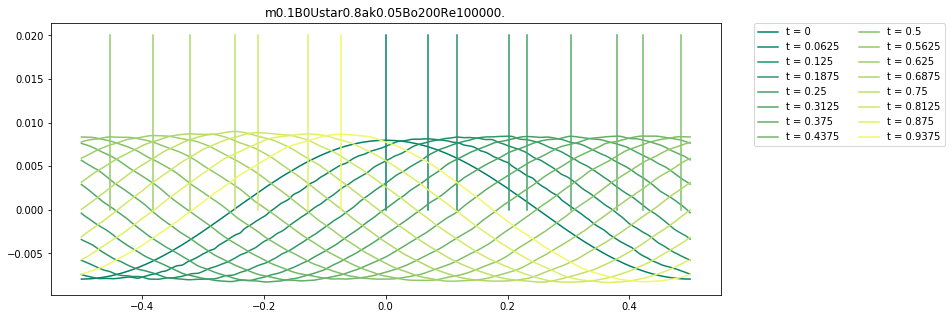

In [43]:
'''
    Sanitor check for elevation shape.
'''  
fig = plt.figure(figsize = [12, 5])
N = 32; delta = 2; 
t = np.zeros(N)
color_idx = np.linspace(0, 1, N//delta+1)
damage = 0
warning = ''
for i in range(0, N, delta):   
    # plot the elevation
    t[i] = i*1./32
    filename = "./eta%g" % t[i]
    exists = os.path.exists(filename)
    if not exists:
        warning += 't=%g ' % t[i]
        damage = 1
    if exists:
        eta = pd.read_table(filename, delimiter = ',')
        eta_sorted = eta.sort_values(by = ['x'])
        plt.plot(eta_sorted.x, eta_sorted.eta, label = 't = %g' %t[i], color=plt.cm.get_cmap('summer')(color_idx[(i+1)//delta]))
        crest = np.array(eta[eta['eta']==eta['eta'].max()].x)
        x_crest = np.average(crest)
        x = x_crest*np.ones(100)
        y = np.linspace(0, 0.02, 100, endpoint=True)
        plt.plot(x, y, color=plt.cm.get_cmap('summer')(color_idx[(i+1)//delta]))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, borderaxespad=0.)
if damage:
    plt.title('m0.1B0Ustar0.8ak0.05Bo200Re100000., '+warning+' damaged')
if not damage:
    plt.title('m0.1B0Ustar0.8ak0.05Bo200Re100000.')    
plt.show()

A note on legend:
https://stackoverflow.com/questions/42103144/how-to-align-rows-in-matplotlib-legend-with-2-columns